In [14]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from evclust.utils import plotting
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from evclust.utils import display_results_evidential, display_results_fuzzy_partition
from evclust.datasets import load_toys3c2d_3

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 600 - Features 2 - Class 3
          0         1
0 -1.481202  1.365933
1 -3.117600  1.799536
2 -2.103204  1.383472
3 -1.495131  1.474033
4 -3.626634  1.566555


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


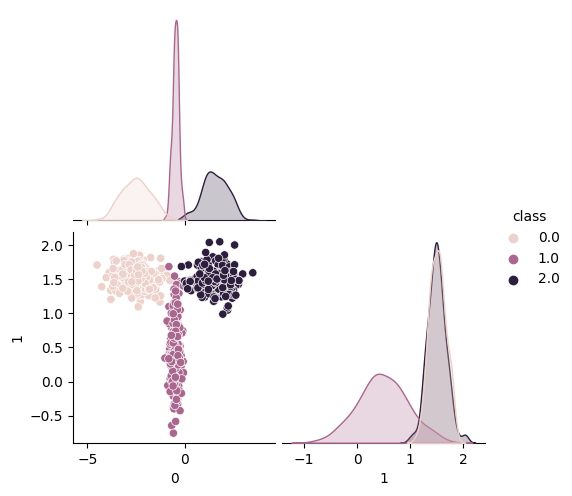

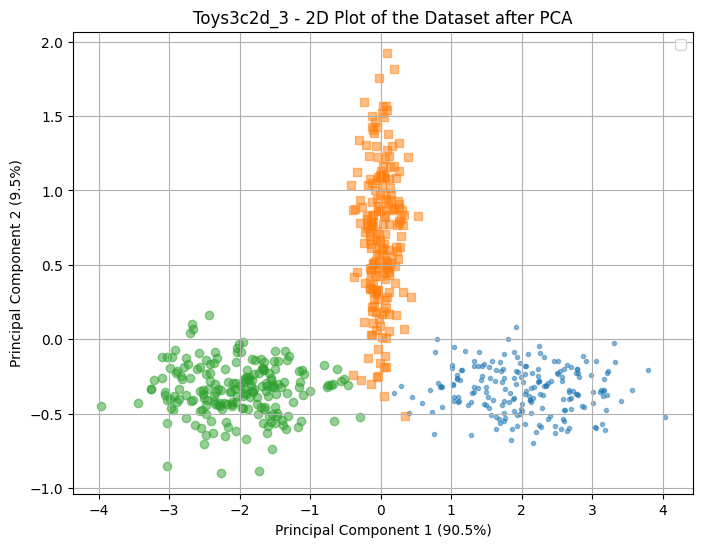

In [15]:
# fetch dataset 
df = load_toys3c2d_3()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 3

plotting(X, y, "Toys3c2d_3", matrix_plot=True)

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

# ECM

In [6]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [3.9541408358362657, 3.9541852608341763, 3.954196400322919, 3.9542080488395217, 3.954251701928766, 3.9542907432073795, 3.9542910668429614, 3.954385270231058, 3.9547106061011443, 5.412837424655254]
ARI values: [0.723462895451986, 0.723462895451986, 0.723462895451986, 0.723462895451986, 0.7161331727935353, 0.7234810356330568, 0.723462895451986, 0.7234810356330568, 0.723462895451986, 0.6523119171867481]
NS values: [1.6972312481563332, 1.5272678579174306, 1.6979279291542033, 1.4658001961175084, 1.7107606660732215, 1.6967682046333168, 1.527185854323078, 1.5278630212110393, 1.4657220123049437, 1.883179127227506]
NMI values: [0.7225507184658665, 0.7225507184658666, 0.7225507184658666, 0.7225507184658665, 0.7171260790230346, 0.7226781736665707, 0.7225507184658666, 0.7226781736665705, 0.7225507184658665, 0.6600209467334885]


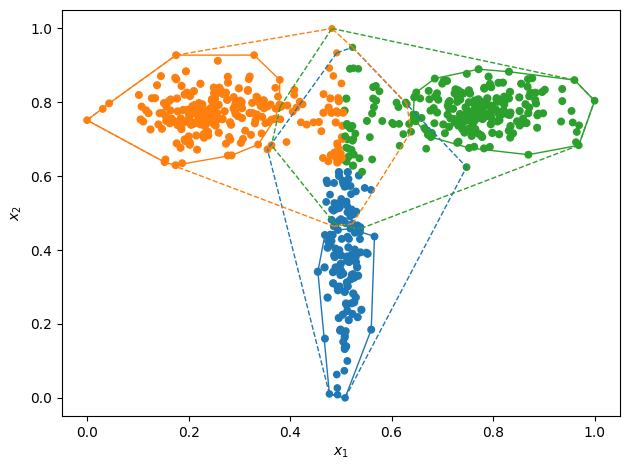

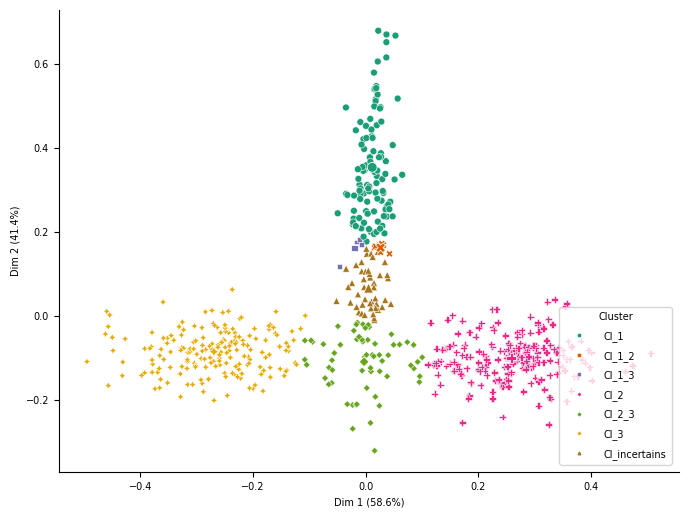

In [7]:

display_results_evidential(X, ecm_models, numeric_labels)

# WECM

In [19]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="kmeans")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.25722517817827006, 0.25722517817827006, 0.25722517817827245, 0.2572251781782731, 0.2572251781782731, 0.2572251781782731, 0.2572251781782731, 0.2572251781782731, 0.2572251781782733, 0.2572251781782733]
ARI values: [0.5701601627778569, 0.5701601627778569, 0.5701601627778569, 0.5701601627778569, 0.5701601627778569, 0.5701601627778569, 0.5701601627778569, 0.5701601627778569, 0.5701601627778569, 0.5701601627778569]
NS values: [1.5367389358195491, 1.5367389358195491, 1.8083972203429228, 1.719613377041682, 1.719613377041682, 1.719613377041682, 1.719613377041682, 1.719613377041682, 1.7731438609135883, 1.7731438609135883]
NMI values: [0.5548891234035673, 0.5548891234035673, 0.5548891234035673, 0.5548891234035672, 0.5548891234035672, 0.5548891234035672, 0.5548891234035672, 0.5548891234035672, 0.5548891234035673, 0.5548891234035673]


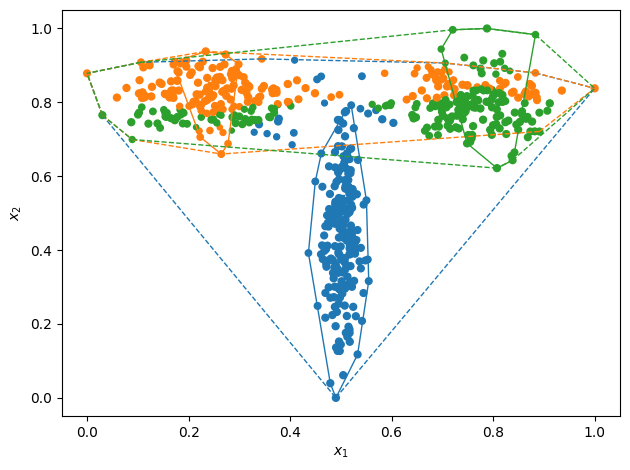

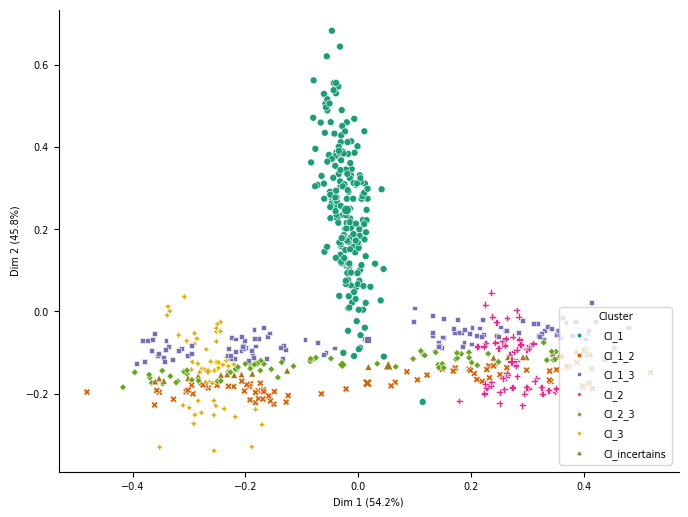

In [20]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [ ]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# WFCM Wang2004

In [ ]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=3.1, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

In [ ]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [ ]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, init="None")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [ ]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [ ]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [ ]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)